In [1]:
!pip install pandas numpy

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!python --version

Python 3.12.4


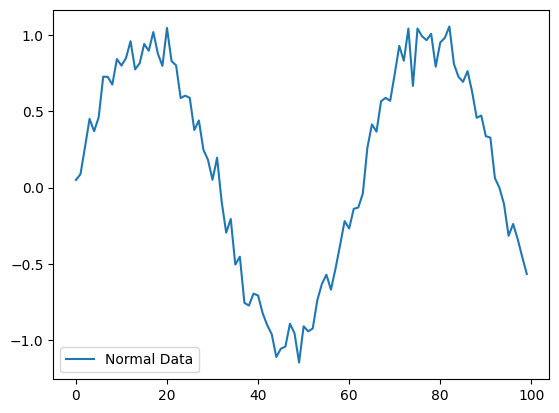

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate baseline normal data
np.random.seed(42)
time_series_length = 100
baseline_data = np.sin(np.linspace(0, 10, time_series_length)) + np.random.normal(0, 0.1, time_series_length)
time_series = pd.Series(baseline_data)

plt.plot(time_series, label='Normal Data')
plt.legend()
plt.show()


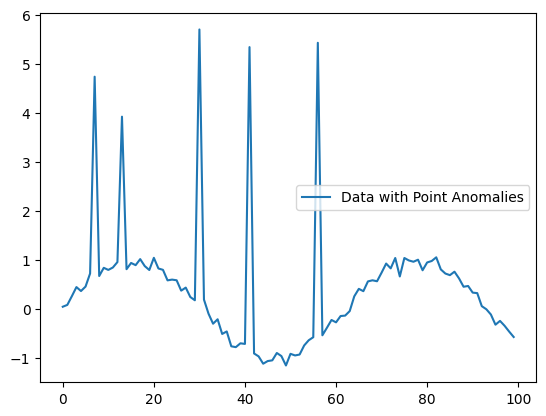

In [2]:
# Introduce point anomalies
anomaly_indices = np.random.choice(time_series_length, size=5, replace=False)
time_series_with_anomalies = time_series.copy()
time_series_with_anomalies.iloc[anomaly_indices] += np.random.normal(5, 1, size=5)

plt.plot(time_series_with_anomalies, label='Data with Point Anomalies')
plt.legend()
plt.show()


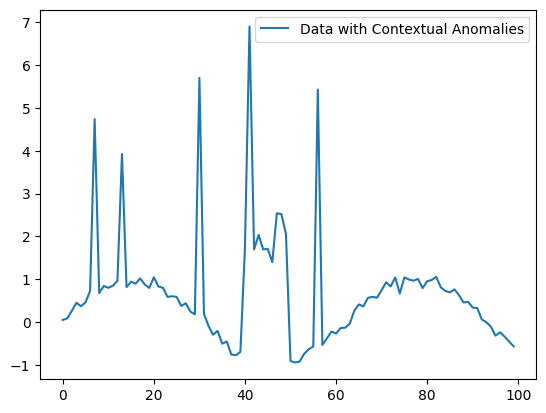

In [3]:
# Introduce contextual anomalies
contextual_anomaly_indices = np.arange(40, 50)
time_series_with_anomalies.iloc[contextual_anomaly_indices] += np.random.normal(3, 0.5, size=len(contextual_anomaly_indices))

plt.plot(time_series_with_anomalies, label='Data with Contextual Anomalies')
plt.legend()
plt.show()


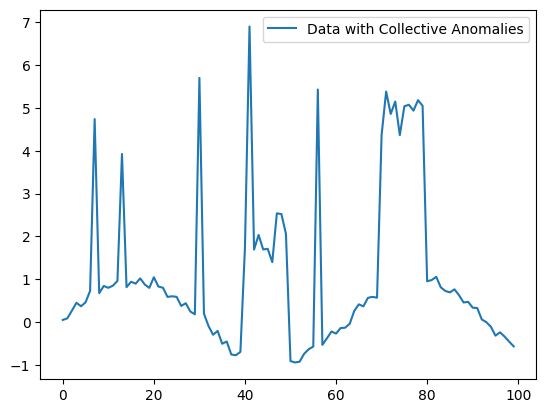

In [4]:
# Introduce collective anomalies
collective_anomaly_indices = np.arange(70, 80)
time_series_with_anomalies.iloc[collective_anomaly_indices] += np.random.normal(4, 0.2, size=len(collective_anomaly_indices))

plt.plot(time_series_with_anomalies, label='Data with Collective Anomalies')
plt.legend()
plt.show()


In [2]:
import requests

url = "https://www.flipkart.com/"
r=requests.get(url)
print(r)

<Response [200]>


In [7]:
!pip install beautifulsoup4


In [8]:
from bs4 import BeautifulSoup

In [1]:
def scrape_reviews1(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }


    response = requests.get(url,headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    reviews=[]
    most_helpful_reviews_section = soup.find("div", class_="DOjaWF gdgoEp col-9-12")
    if most_helpful_reviews_section:
        div_tags = most_helpful_reviews_section.find_all("div", class_="col EPCmJX Ma1fCG")

        for divs in div_tags:
            review_data = {}
            # Extract product name
            rating = divs.find("div", class_="XQDdHH Ga3i8K")
            if rating:
                review_data["rating"] = rating.get_text(strip=True)

            # Extract current price
            heading = divs.find("p", class_="z9E0IG")
            if heading:
                review_data["heading"] = heading.get_text(strip=True)

            # Extract original price
            content = divs.find("div", class_="ZmyHeo")
            if content:
                review_data["review_content"] = content.get_text(strip=True)
        reviews.append(review_data)

    return reviews

headers = {
    "Accept-language": "en-GB,en;q=0.9",
    "Accept-Encoding": "gzip, deflate, br",
    "Cache-Control": "max-age=0",
    "Connection": "keep-alive",
    "User-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.1 Safari/605.1.15",
}

def getdata(url):
    source = requests.get(url, headers=headers)
    soup = BeautifulSoup(source.content, "html.parser")
    return soup

def scrape_reviews2(url):
    reviews = []
    for page in range(1, 25):
        paginated_url = f"{url}&page={page}"

        soup = getdata(paginated_url)

        if soup is None:
            break
        reviews=[]
    most_helpful_reviews_section = soup.find("div", class_="DOjaWF gdgoEp col-9-12")
    if most_helpful_reviews_section:
        div_tags = most_helpful_reviews_section.find_all("div", class_="col EPCmJX Ma1fCG")

        for divs in div_tags:
            review_data = {}
            # Extract product name
            rating = divs.find("div", class_="XQDdHH Ga3i8K")
            if rating:
                review_data["rating"] = rating.get_text(strip=True)

            # Extract current price
            heading = divs.find("p", class_="z9E0IG")
            if heading:
                review_data["heading"] = heading.get_text(strip=True)

            # Extract original price
            content = divs.find("div", class_="ZmyHeo")
            if content:
                review_data["review_content"] = content.get_text(strip=True)
        reviews.append(review_data)
    return reviews

url="https://www.flipkart.com/noymi-4-1-waterproof-ipx6-electric-shaver-trimmer-men/product-reviews/itm74bf90c312398?pid=SHVGKFGXEVNXEEBR&lid=LSTSHVGKFGXEVNXEEBR9V6WFW&marketplace=FLIPKART"
reviews = scrape_reviews1(url)
review2 = scrape_reviews1(url)

reviews.extend(review2)
for i in reviews:
    print(i)

NameError: name 'requests' is not defined

# Flipkart webscrapping

In [17]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException
import time
import logging
 
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
 
def get_flipkart_brands():
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--disable-gpu")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")
    chrome_options.add_argument("--window-size=1920,1080")
    chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")
 
    driver = webdriver.Chrome(options=chrome_options)
    
    try:
        driver.get("https://www.flipkart.com/audio-video/speakers/pr?sid=0pm%2C0o7")
        logger.info("Navigated to Flipkart speakers page")
        
        # Wait for the page to load
        time.sleep(5)
 
        # Find and click the brand section
        try:
            brand_section = WebDriverWait(driver, 20).until(
                EC.element_to_be_clickable((By.XPATH, "//div[contains(@class, 'FtQCb2 _3Owiq+') and .//div[contains(text(), 'Brand')]]"))
            )
            brand_section.click()
            logger.info("Clicked on Brand section")
        except TimeoutException:
            logger.error("Could not find Brand section")
            return []
 
        time.sleep(2)
 
        # Find and click the "MORE" button
        try:
            more_button = WebDriverWait(driver, 20).until(
                EC.element_to_be_clickable((By.XPATH, "//div[contains(@class, 'e+xvXX KvHRYS') and .//span[contains(text(), 'MORE')]]"))
            )
            more_button.click()
            logger.info("Clicked on 'MORE' to show all brands")
        except TimeoutException:
            logger.error("Could not find 'MORE' button")
            return []
 
        time.sleep(2)
 
        # Extract brand names
        brand_elements = driver.find_elements(By.XPATH, "//div[contains(@class, 'QCKZip hpLdC3')]/div[contains(@class, 'tJjCVx TXuYBI')]")
        brand_names = [brand.text for brand in brand_elements if brand.text]
        logger.info(f"Found {len(brand_names)} brands")
        return brand_names
    
    except Exception as e:
        logger.error(f"An error occurred: {str(e)}")
        return []
    
    finally:
        driver.quit()
 
if __name__ == "__main__":
    brands = get_flipkart_brands()
    print("Flipkart Speaker Brands:")
    for i, brand in enumerate(brands, 1):
        print(f"{i}. {brand}")
    print(f"Total brands found: {len(brands)}")

INFO:__main__:Navigated to Flipkart speakers page
INFO:__main__:Clicked on Brand section
INFO:__main__:Clicked on 'MORE' to show all brands
INFO:__main__:Found 778 brands


Flipkart Speaker Brands:
1. boAt
2. JBL
3. ZEBRONICS
4. MOTOROLA
5. SONY
6. Bose
7. GUGGU
8. Clairbell
9. YAROH
10. FRONY
11. SYARA
12. ROAR
13. Sagaft
14. Ziddjeet
15. Nilesawar
16. Khatusha
17. Stybits
18. Bydye
19. Bashaam
20. SACRO
21. BAYEEN
22. ZWOLLEX
23. Shamsa
24. 3BAAN
25. Treadmill
26. ZSIV
27. MZ
28. RECTITUDE
29. GDS
30. Harjio
31. Worricow
32. NKL
33. Soroo Future
34. Bxeno
35. DHAN GRD
36. Quaranel
37. Techobucks
38. TWS
39. D1Y3
40. G2L
41. ATARC
42. RZW
43. PRONOVA
44. CIHYARD
45. Musify
46. MSNR
47. blutap
48. ROKAVO
49. TX -FLO
50. WOOS
51. TEQIR
52. Uborn
53. Yoment
54. Xhimdun
55. Techpunch
56. RENTOOR
57. ultiads
58. RPMSD
59. Bencley
60. ATIASRAMA
61. CYOMI
62. Borneo
63. ANY KART
64. ATSolutions
65. RZG
66. Hexa
67. Portronics
68. fire turtle
69. SSVOCATIONPOINT
70. netpaa
71. Tunifi
72. Pick Ur Needs
73. TRONICA
74. IMMUTABLE
75. TERABYTE
76. Wifton
77. LIMBRO
78. ENMORA
79. Buy Genuine
80. IZWI
81. wazny
82. GOOD FUN
83. MOBONE
84. A CONNECT Z
85. world voice


In [11]:
import hashlib

# Example password
pwd = '123'

# Step-by-step breakdown
encoded_pwd = pwd.encode('utf-8')             # Encoding the password into bytes
md5_hash_object = hashlib.md5(encoded_pwd)    # Creating an MD5 hash object and updating it with the bytes
hex_digest = md5_hash_object.hexdigest()      # Generating the hexadecimal digest

# The line of code in question
m = hashlib.md5(pwd.encode('utf-8')).hexdigest()

# Printing the result
print(m)  # Output: ece9b1b454fae84424258c5bfc193c6d (this will be different for different passwords)


202cb962ac59075b964b07152d234b70


# MySQL in python notebook

In [5]:
import pymysql

# Establish the database connection
connection = pymysql.connect(
    host='localhost',         # Replace with your host, e.g., 'localhost'
    user='myuser',     # Replace with your MySQL username
    password='mypassword', # Replace with your MySQL password
    database='my_database', # Replace with your database name
    # charset='utf8mb4',        # Specify the charset
    cursorclass=pymysql.cursors.DictCursor
)

try:
    with connection.cursor() as cursor:
        # Define the SQL INSERT statement
        sql_insert = """
        INSERT INTO user_master (
            usr_pk_id,usr_code, usr_unique_id, usr_fh_id, usr_parent_id, lyt_user_id,
            usr_name, usr_email, usr_alternate_email, usr_mobile, usr_alternate_mobile,
            usr_phone, usr_alternate_phone, usr_password, usr_pin, role_fk_id,
            acm_fk_id, prgm_fk_id, usr_member_code, usr_member_role, usr_facebook_id,
            usr_linkedin_id, usr_twitter_id, usr_googleplus_id, usr_pan, usr_ssn,
            usr_voter_id, usr_driving_licence, usr_bank_account, usr_passport, usr_fax,
            usr_report_to, usr_map_to, usr_type, usr_last_login_time, usr_flag_mail,
            usr_is_active, usr_is_approved, usr_is_unsubscribed, usr_created_by,
            usr_created_date, usr_is_removed, usr_is_duplicate, usr_tags
        ) VALUES (
            %s, %s, %s, %s, %s,
            %s, %s, %s, %s, %s,
            %s, %s, %s, %s, %s,
            %s, %s, %s, %s, %s,
            %s, %s, %s, %s, %s,
            %s, %s, %s, %s, %s,
            %s, %s, %s, %s, %s,
            %s, %s, %s, %s, %s,
            %s, %s, %s, %s
        )
        """
        
        # Define the values to insert (these are examples, replace them with actual values)
        values = (
            32089988,'U001', 'unique_id_1', 'fh_id_1', 123, 456,
            'John Doe', 'rawatjiharsh@gmail.com', 'alternate@example.com', '1234567890', '0987654321',
            '1112223333', '4445556666', '5f4dcc3b5aa765d61d8327deb882cf99', '1234', 1,
            1, 1, 'MC001', 'MR001', 'facebook_id_1',
            'linkedin_id_1', 'twitter_id_1', 'googleplus_id_1', 'PAN12345', 'SSN12345',
            'VOTER12345', 'DL12345', 'BANK12345', 'PASSPORT12345', 'FAX12345',
            789, 1011, 0, '2024-06-01 12:00:00', 0,
            1, 1, 0, 999, '2024-06-01 12:00:00',
            0, 0, 'tags_example'
        )
        
        # Execute the SQL command
        cursor.execute(sql_insert, values)
        
        # Commit the transaction
        connection.commit()
        
finally:
    # Close the connection
    connection.close()


In [3]:
import pymysql

# Connect to the MySQL database
connection = pymysql.connect(
    host='localhost',         # Replace with your host, e.g., 'localhost'
    user='myuser',     # Replace with your MySQL username
    password='mypassword', # Replace with your MySQL password
    database='my_database', # Replace with your database name
    # charset='utf8mb4',        # Specify the charset
    cursorclass=pymysql.cursors.DictCursor
)

try:
    with connection.cursor() as cursor:
        # Define the SQL DELETE statement
        sql_delete_all = "DELETE FROM user_master"
        
        # Execute the SQL command
        cursor.execute(sql_delete_all)
        
        # Commit the transaction
        connection.commit()
        
        # Print the number of affected rows
        print(f"{cursor.rowcount} rows deleted.")
        
finally:
    # Close the connection
    connection.close()


0 rows deleted.


# Making Graphs

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Define the sample data
client_names = ['ClientA', 'ClientB', 'ClientC', 'ClientD', 'ClientE']
channels = ['whatsapp', 'sms', 'email', 'push_notification']

# Number of rows to generate
num_rows = 20

# Generate the sample data
data = {
    'client name': [random.choice(client_names) for _ in range(num_rows)],
    'channel': [random.choice(channels) for _ in range(num_rows)],
    'date': [(datetime.now() - timedelta(days=random.randint(0, 365))).date() for _ in range(num_rows)]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


In [9]:
import pandas as pd
import random

# Define the sample data
client_names = ['A', 'B', 'C', 'D', 'E']
channels = ['whatsapp', 'sms', 'email', 'push_notification']

# Number of rows to generate
num_rows = 200000

# Define the date range
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2024-05-31')

# Generate the sample data
data = {
    'client name': [random.choice(client_names) for _ in range(num_rows)],
    'channel': [random.choice(channels) for _ in range(num_rows)],
    'date': [
        start_date + pd.DateOffset(days=random.randint(0, (end_date - start_date).days))
        for _ in range(num_rows)
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


       client name   channel       date
0                A  whatsapp 2023-08-29
1                E  whatsapp 2024-04-24
2                A     email 2023-05-28
3                D     email 2024-01-02
4                A  whatsapp 2023-05-06
...            ...       ...        ...
199995           A  whatsapp 2023-03-08
199996           D       sms 2023-03-02
199997           A     email 2024-01-17
199998           E       sms 2023-10-20
199999           A  whatsapp 2023-08-06

[200000 rows x 3 columns]


In [ ]:
df.to_csv('sample.csv')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22132\382713008.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_client_a['year_month'] = df_client_a['date'].dt.to_period('M')


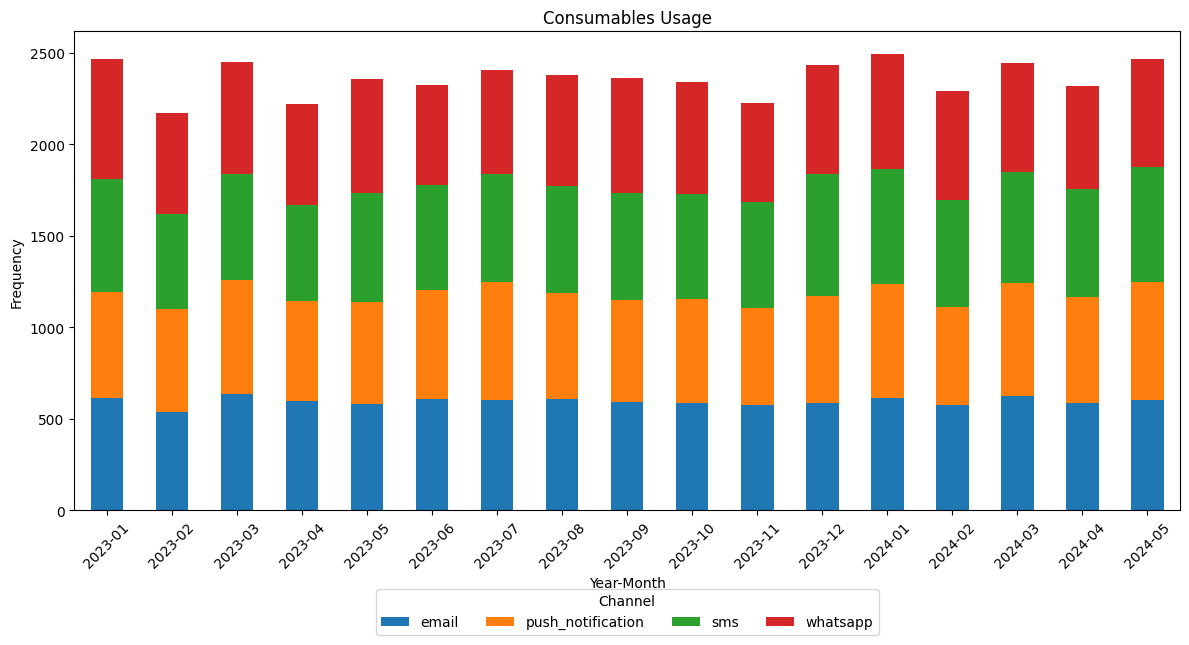

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for Client A
df_client_a = df[df['client name'] == 'A']

# Extract year and month from date
df_client_a['year_month'] = df_client_a['date'].dt.to_period('M')

# Group by year_month and channel, and count occurrences
grouped = df_client_a.groupby(['year_month', 'channel']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))
grouped.plot(kind='bar', stacked=True, ax=ax)

# Customize the legend
ax.legend(title='Channel', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4)

# Add titles and labels
plt.title('Consumables Usage')
plt.xlabel('Year-Month')
plt.ylabel('Frequency')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Show the plot
plt.show()


# Consumables SMS Sent

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22132\4096014573.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sms['year_month'] = df_sms['date'].dt.to_period('M')


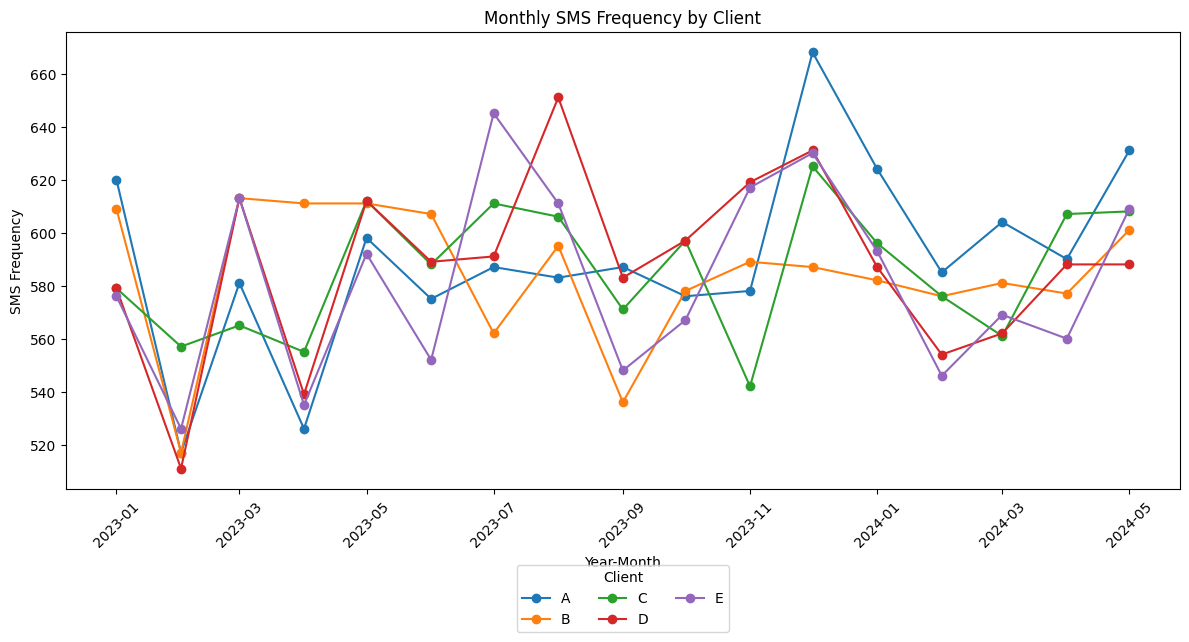

In [15]:
import matplotlib.pyplot as plt


# Filter data for SMS channel
df_sms = df[df['channel'] == 'sms']

# Extract year and month from date
df_sms['year_month'] = df_sms['date'].dt.to_period('M')

# Group by client name and year_month, and count occurrences
grouped_sms = df_sms.groupby(['client name', 'year_month']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))

# Plot each client's SMS data
for client in grouped_sms.index:
    ax.plot(grouped_sms.columns.to_timestamp(), grouped_sms.loc[client], marker='o', label=client)

# Add titles and labels
plt.title('Monthly SMS Frequency by Client')
plt.xlabel('Year-Month')
plt.ylabel('SMS Frequency')

# Customize the legend
ax.legend(title='Client', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Show the plot
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22132\829737298.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sms['year_month'] = df_sms['date'].dt.to_period('M')


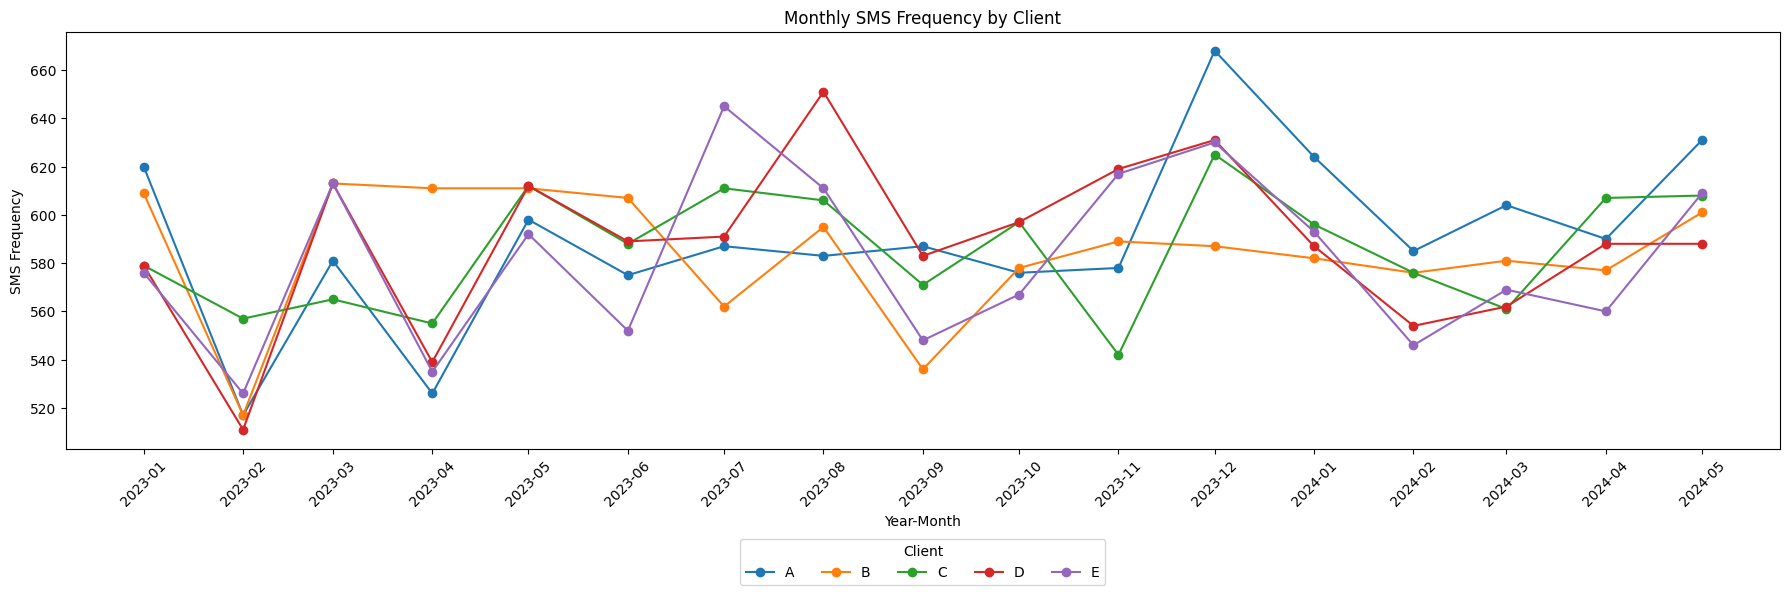

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter data for SMS channel
df_sms = df[df['channel'] == 'sms']

# Extract year and month from date
df_sms['year_month'] = df_sms['date'].dt.to_period('M')

# Group by client name and year_month, and count occurrences
grouped_sms = df_sms.groupby(['client name', 'year_month']).size().unstack(fill_value=0)

# Set up a wide figure
fig, ax = plt.subplots(figsize=(18, 7))  # Increase width to 18 inches

# Plot each client's SMS data
for client in grouped_sms.index:
    ax.plot(grouped_sms.columns.to_timestamp(), grouped_sms.loc[client], marker='o', label=client)

# Add titles and labels
plt.title('Monthly SMS Frequency by Client')
plt.xlabel('Year-Month')
plt.ylabel('SMS Frequency')

# Customize the legend
ax.legend(title='Client', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=5)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Ensure every month is displayed on the x-axis
ax.set_xticks(pd.date_range(start=start_date, end=end_date, freq='MS'))
ax.set_xticklabels(pd.date_range(start=start_date, end=end_date, freq='MS').strftime('%Y-%m'))

# Adjust layout to make room for the legend and x-axis labels
plt.tight_layout(rect=[0, 0.1, 1, 1])

# Show the plot
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22132\2415984823.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sms['year_month'] = df_sms['date'].dt.to_period('M')


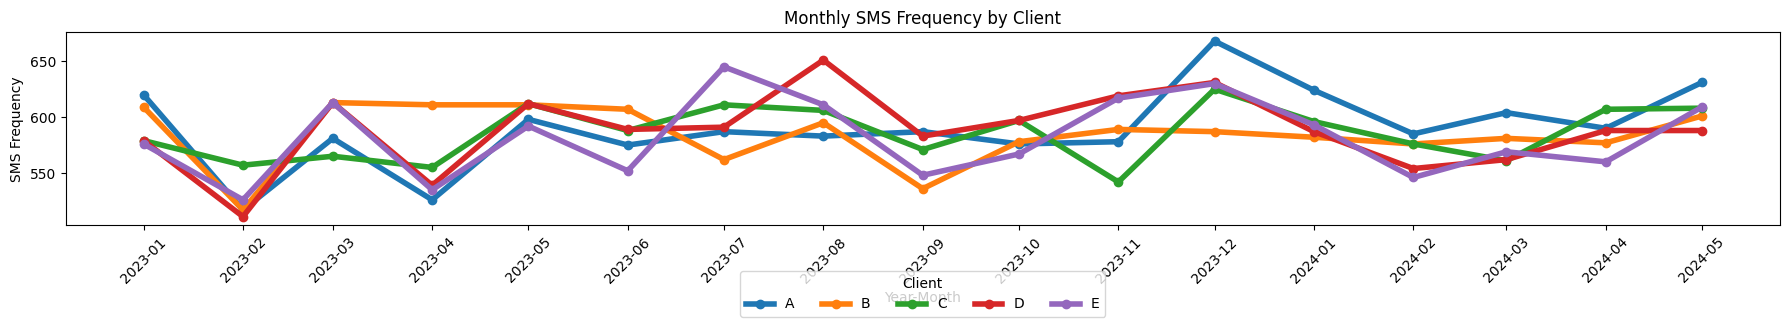

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df is already defined and contains your data

# Filter data for SMS channel
df_sms = df[df['channel'] == 'sms']

# Extract year and month from date
df_sms['year_month'] = df_sms['date'].dt.to_period('M')

# Group by client name and year_month, and count occurrences
grouped_sms = df_sms.groupby(['client name', 'year_month']).size().unstack(fill_value=0)

# Set up a wide figure
fig, ax = plt.subplots(figsize=(18, 4))  # Increase width to 18 inches

# Plot each client's SMS data with thicker lines
for client in grouped_sms.index:
    ax.plot(grouped_sms.columns.to_timestamp(), grouped_sms.loc[client], marker='o', label=client, linewidth=4)  # Adjust linewidth here

# Add titles and labels
plt.title('Monthly SMS Frequency by Client')
plt.xlabel('Year-Month')
plt.ylabel('SMS Frequency')

# Customize the legend
ax.legend(title='Client', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=5)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Ensure every month is displayed on the x-axis
start_date = df_sms['date'].min().replace(day=1)
end_date = df_sms['date'].max().replace(day=1)
ax.set_xticks(pd.date_range(start=start_date, end=end_date, freq='MS'))
ax.set_xticklabels(pd.date_range(start=start_date, end=end_date, freq='MS').strftime('%Y-%m'))

# Adjust layout to make room for the legend and x-axis labels
plt.tight_layout(rect=[0, 0.1, 1, 1])

# Show the plot
plt.show()


In [17]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Number of rows to generate
num_rows = 10000

# Generate random data
data = {
    # 'pet_pk_id': np.arange(1, num_rows + 1),
    'acm_fk_id': np.random.choice([5656,60,5172,5249]),
    'prgm_fk_id': 5661,
    'pet_type': np.random.choice(['Email Sent', 'push notification', 'SMS Sent', 'Voice', 'Whatsapp Sent'], size=num_rows),
    'pet_direction': np.random.choice(['Egress', 'Ingress'], size=num_rows),
    'pet_remark': ['remark_' + str(i) for i in range(num_rows)],
    'pet_category': np.random.choice(['BEU', 'OTHER'], size=num_rows),
    'pet_eventdate': [datetime(2015,1,1) + timedelta(days=random.randint(0, (datetime.now() - datetime(2015,1,1)).days)) for i in range(num_rows)],  # Random dates over the past 10 years
    'pet_count': np.random.randint(1, 30000, size=num_rows),
    'pet_created_on': [datetime(2015,1,1) + timedelta(days=random.randint(0, (datetime.now() - datetime(2015,1,1)).days)) for i in range(num_rows)],  # Random creation dates over the past year
    'pet_modified_on': [datetime(2015,1,1) + timedelta(days=random.randint(0, (datetime.now() - datetime(2015,1,1)).days)) for i in range(num_rows)],  # Random modification dates over the past month
    'pet_isactive': [1]*num_rows,
    'pet_ispushedtofh': [0]*num_rows,
    'pet_isbillable': [1]*num_rows,
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert date columns to datetime format
df['pet_eventdate'] = pd.to_datetime(df['pet_eventdate'])

print(df['pet_eventdate'].dtype)
# df['pet_created_on'] = pd.to_datetime(df['pet_created_on'])
# df['pet_modified_on'] = pd.to_datetime(df['pet_modified_on'])

print(df['pet_created_on'].dtype)

# Print DataFrame
# print(df)

# Optionally, save to CSV for inspection
# df.to_csv('random_data.csv', index=False)


datetime64[ns]
datetime64[ns]


In [9]:
import pymysql

# Connect to the MySQL database
connection = pymysql.connect(
    host='localhost',         # Replace with your host, e.g., 'localhost'
    user='myuser',     # Replace with your MySQL username
    password='mypassword', # Replace with your MySQL password
    database='my_database', # Replace with your database name
    # charset='utf8mb4',        # Specify the charset
    cursorclass=pymysql.cursors.DictCursor
)

try:
    with connection.cursor() as cursor:
        # Define the SQL DELETE statement
        sql = ""
        
        # Execute the SQL command
        cursor.execute(sql_delete_all)
        
        # Commit the transaction
        connection.commit()
        
        # Print the number of affected rows
        print(f"{cursor.rowcount} rows deleted.")
        
finally:
    # Close the connection
    connection.close()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3008\3997652503.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, connection)


,pet_pk_id,acm_fk_id,prgm_fk_id,pet_type,pet_direction,pet_remark,pet_category,pet_eventdate,pet_count,pet_created_on,pet_modified_on,pet_isactive,pet_ispushedtofh,pet_isbillable
0,pet_pk_id,acm_fk_id,prgm_fk_id,pet_type,pet_direction,pet_remark,pet_category,pet_eventdate,pet_count,pet_created_on,pet_modified_on,pet_isactive,pet_ispushedtofh,pet_isbillable
1,pet_pk_id,acm_fk_id,prgm_fk_id,pet_type,pet_direction,pet_remark,pet_category,pet_eventdate,pet_count,pet_created_on,pet_modified_on,pet_isactive,pet_ispushedtofh,pet_isbillable
2,pet_pk_id,acm_fk_id,prgm_fk_id,pet_type,pet_direction,pet_remark,pet_category,pet_eventdate,pet_count,pet_created_on,pet_modified_on,pet_isactive,pet_ispushedtofh,pet_isbillable
3,pet_pk_id,acm_fk_id,prgm_fk_id,pet_type,pet_direction,pet_remark,pet_category,pet_eventdate,pet_count,pet_created_on,pet_modified_on,pet_isactive,pet_ispushedtofh,pet_isbillable
4,pet_pk_id,acm_fk_id,prgm_fk_id,pet_type,pet_direction,pet_remark,pet_category,pet_eventdate,pet_count,pet_created_on,pet_modified_on,pet_isactive,pet_ispushedtofh,pet_isbillable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,pet_pk_id,acm_fk_id,prgm_fk_id,pet_type,pet_direction,pet_remark,pet_category,pet_eventdate,pet_count,pet_created_on,pet_modified_on,pet_isactive,pet_ispushedtofh,pet_isbillable
10096,pet_pk_id,acm_fk_id,prgm_fk_id,pet_type,pet_direction,pet_remark,pet_category,pet_eventdate,pet_count,pet_created_on,pet_modified_on,pet_isactive,pet_ispushedtofh,pet_isbillable
10097,pet_pk_id,acm_fk_id,prgm_fk_id,pet_type,pet_direction,pet_remark,pet_category,pet_eventdate,pet_count,pet_created_on,pet_modified_on,pet_isactive,pet_ispushedtofh,pet_isbillable
10098,pet_pk_id,acm_fk_id,prgm_fk_id,pet_type,pet_direction,pet_remark,pet_category,pet_eventdate,pet_count,pet_created_on,pet_modified_on,pet_isactive,pet_ispushedtofh,pet_isbillable


In [ ]:
import pymysql

# Connect to the MySQL database
connection = pymysql.connect(
    host='localhost',         # Replace with your host, e.g., 'localhost'
    user='myuser',     # Replace with your MySQL username
    password='mypassword', # Replace with your MySQL password
    database='my_database', # Replace with your database name
    # charset='utf8mb4',        # Specify the charset
    cursorclass=pymysql.cursors.DictCursor
)

try:
    with connection.cursor() as cursor:
        # Define the SQL insert statement
        sql = "select * from prgm_event_transaction"
        
        # Execute the SQL command
        df = pd.read_sql(sql, connection)

    # Display the DataFrame
        display(df)
        
finally:
    # Close the connection
    connection.close()


# Table creation in MYSQL though ipynb

In [12]:
import pymysql
import pymysql.cursors

connection = pymysql.connect(
    host = "localhost",
    user = "myuser",
    password = "mypassword",
    database= "my_database",
    cursorclass=pymysql.cursors.DictCursor
)

try:
    with connection.cursor() as cursor:
        sql = " create table sample (s_no integer auto_increment primary key, name char(50))"

        cursor.execute(sql)

        connection.commit()
        print(f"table created")

finally:
    connection.close()

table created


In [13]:
import pymysql
import pymysql.cursors

connection = pymysql.connect(
    host = "localhost",
    user = "myuser",
    password = "mypassword",
    database= "my_database",
    cursorclass=pymysql.cursors.DictCursor
)

try:
    with connection.cursor() as cursor:
        sql = "alter table sample add (dob datetime, event date)"

        cursor.execute(sql)

        connection.commit()
        print(f"table created")

finally:
    connection.close()

table created


In [19]:
df = pd.DataFrame(
    {
        "name":["Harsh"],
        "dob":[datetime.now()],
        "event":[datetime.now()]
        
    }
)



In [31]:
from datetime import datetime

# Create a datetime object
dt = datetime.now()

# Convert it to a date object
date_obj = dt.date()

print(date_obj)
type(date_obj)

2024-06-11


datetime.datetime

In [32]:
import pymysql
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Number of rows to generate
num_rows = 10000

# Generate random data
data = {
    # 'pet_pk_id': np.arange(1, num_rows + 1),  # Autoincrement, so this can be omitted
    'acm_fk_id': np.random.choice([5656, 60, 5172, 5249], size=num_rows),
    'prgm_fk_id': [5661] * num_rows,
    'pet_type': np.random.choice(['Email Sent', 'push notification', 'SMS Sent', 'Voice', 'Whatsapp Sent'], size=num_rows),
    'pet_direction': np.random.choice(['Egress', 'Ingress'], size=num_rows),
    'pet_remark': ['remark_' + str(i) for i in range(num_rows)],
    'pet_category': np.random.choice(['BEU', 'OTHER'], size=num_rows),
    'pet_eventdate': [datetime(2015,1,1) + timedelta(days=random.randint(0, (datetime.now() - datetime(2015,1,1)).days)) for i in range(num_rows)],
    'pet_count': np.random.randint(1, 30000, size=num_rows),
    'pet_created_on': [datetime(2015,1,1) + timedelta(days=random.randint(0, (datetime.now() - datetime(2015,1,1)).days)) for i in range(num_rows)],
    'pet_modified_on': [datetime(2015,1,1) + timedelta(days=random.randint(0, (datetime.now() - datetime(2015,1,1)).days)) for i in range(num_rows)],
    'pet_isactive': [1]*num_rows,
    'pet_ispushedtofh': [0]*num_rows,
    'pet_isbillable': [1]*num_rows,
}

# Create DataFrame
df = pd.DataFrame(data)

# Print DataFrame
print(df.head())

# Convert date columns to datetime format
df['pet_eventdate'] = pd.to_datetime(df['pet_eventdate']).dt.date
df['pet_created_on'] = pd.to_datetime(df['pet_created_on'])
df['pet_modified_on'] = pd.to_datetime(df['pet_modified_on'])

# Connect to the MySQL database
connection = pymysql.connect(
    host='localhost',         # Replace with your host, e.g., 'localhost'
    user='myuser',     # Replace with your MySQL username
    password='mypassword', # Replace with your MySQL password
    database='my_database', # Replace with your database name
    charset='utf8mb4',        # Specify the charset
    cursorclass=pymysql.cursors.DictCursor
)

try:
    with connection.cursor() as cursor:
        # Define the SQL insert statement
        sql = """
        INSERT INTO prgm_event_transaction (
            acm_fk_id, prgm_fk_id, pet_type, pet_direction, pet_remark, 
            pet_category, pet_eventdate, pet_count, pet_created_on, 
            pet_modified_on, pet_isactive, pet_ispushedtofh, pet_isbillable
        ) VALUES (
            %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s
        )
        """
        
        # Prepare the data for insertion
        rows_to_insert = [
            (
                row['acm_fk_id'], row['prgm_fk_id'], row['pet_type'], row['pet_direction'],
                row['pet_remark'], row['pet_category'], row['pet_eventdate'].strftime('%Y-%m-%d %H:%M:%S'),
                row['pet_count'], row['pet_created_on'].strftime('%Y-%m-%d %H:%M:%S'),
                row['pet_modified_on'].strftime('%Y-%m-%d %H:%M:%S'), row['pet_isactive'],
                row['pet_ispushedtofh'], row['pet_isbillable']
            )
            for _, row in df.iterrows()
        ]
        
        # Execute the SQL command in batches
        batch_size = 1000
        for i in range(0, len(rows_to_insert), batch_size):
            cursor.executemany(sql, rows_to_insert[i:i + batch_size])
        
        # Commit the transaction
        connection.commit()
        
        # Print the number of affected rows
        print(f"{len(rows_to_insert)} rows inserted into prgm_event_transaction")
        
finally:
    # Close the connection
    connection.close()


   acm_fk_id  prgm_fk_id           pet_type pet_direction pet_remark  \
0         60        5661              Voice       Ingress   remark_0   
1       5656        5661           SMS Sent        Egress   remark_1   
2       5656        5661  push notification       Ingress   remark_2   
3       5172        5661         Email Sent        Egress   remark_3   
4       5656        5661           SMS Sent       Ingress   remark_4   

  pet_category pet_eventdate  pet_count pet_created_on pet_modified_on  \
0          BEU    2016-03-06      29501     2015-01-29      2023-11-19   
1          BEU    2022-12-26      14385     2016-07-31      2019-11-25   
2          BEU    2022-06-12      12609     2021-12-10      2018-12-04   
3          BEU    2015-05-12      20658     2017-10-22      2020-10-30   
4          BEU    2016-12-27      12605     2022-02-28      2022-10-17   

   pet_isactive  pet_ispushedtofh  pet_isbillable  
0             1                 0               1  
1             1   

# Entering Dataframe into a sql table

In [75]:
np.random.choice(['Unapprove','Pre-Processing','Dispatched','Delivered','Rejected','Cancelled','Return-to-Origin','Partial','Withdrawn','Expired','Order-on-Hold','Approved','Activated','Failed','Incomplete-Address','Non-Serviceable-Area'],size=10)


array(['Order-on-Hold', 'Failed', 'Dispatched', 'Incomplete-Address',
       'Unapprove', 'Partial', 'Expired', 'Rejected', 'Unapprove',
       'Partial'], dtype='<U20')

In [11]:
!pip show cryptography

Name: cryptography
Version: 42.0.8
Summary: cryptography is a package which provides cryptographic recipes and primitives to Python developers.
Home-page: 
Author: 
Author-email: The Python Cryptographic Authority and individual contributors <cryptography-dev@python.org>
License: Apache-2.0 OR BSD-3-Clause
Location: C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: cffi
Required-by: 


In [2]:
import cryptography
import pandas as pd
import numpy as np
from faker import Faker
from sqlalchemy import create_engine
import pymysql
import random

# Initialize Faker
fake = Faker()

# Generate random data for the DataFrame
def generate_data(n):
    data = {
        'ord_pk_id': np.arange(1, n+1),
        'crm_fk_id': np.random.randint(100, 1000, size=n),
        'aff_fk_id': np.random.randint(10, 100, size=n),
        'client_fk_id': np.random.randint(200, 1000, size=n),
        'prgm_fk_id': np.random.choice([1,2,3,4,5], size=n),
        'shp_fk_id': np.random.randint(400, 1000, size=n),
        'opportunity_id': np.random.randint(500, 1000, size=n),
        'mer_order_id': [fake.uuid4() for _ in range(n)],
        'ord_trackingno': [fake.uuid4()[:8] for _ in range(n)],
        'ord_edc_no': [fake.uuid4() for _ in range(n)],
        'ord_transid': [fake.uuid4()[:6] for _ in range(n)],
        'ord_amount_chargeable': np.random.choice(np.random.randint(100,10000,size=934),size=n),
        'ord_quantity': np.random.randint(1, 10, size=n).astype(str),
        'order_tax_amount': np.random.choice(np.random.randint(1,1000,size=934),size=n),
        'tax_per_qty': np.round(np.random.uniform(5, 50, size=n), 2),
        'ord_variant': [fake.word() for _ in range(n)],
        'ord_amount_received': np.round(np.random.uniform(50, 900, size=n), 4),
        'ord_amount_refunded': np.round(np.random.uniform(0, 50, size=n), 4),
        'ord_payment_type': ['CC' for _ in range(n)],
        'ord_emi_percentage': np.round(np.random.uniform(0, 10, size=n), 2),
        'ord_emi_duration': np.random.randint(0, 24, size=n),
        'ord_payment_status': ['Completed' for _ in range(n)],
        'ord_payment_message': ['Payment successful' for _ in range(n)],
        'ord_order_status': np.random.choice(['Unapprove','Pre-Processing','Dispatched','Delivered','Rejected','Cancelled','Return-to-Origin','Partial','Withdrawn','Expired','Order-on-Hold','Approved','Activated','Failed','Incomplete-Address','Non-Serviceable-Area'],size=n),
        'ord_payment_gateway': [random.choice(['cellpay', 'direcpay']) for _ in range(n)],
        'pg_fk_id': np.random.randint(1, 10, size=n),
        'ord_order_datetime': [fake.date_time_this_decade() for _ in range(n)],
        'callstat_fk_id': np.random.randint(1, 10, size=n),
        'ord_modified_date': [fake.date_time_this_decade() for _ in range(n)],
        'ord_modified_by': ['admin' for _ in range(n)],
        'ord_modified_reason': ['Initial entry' for _ in range(n)],
        'ord_placed_by': [fake.user_name() for _ in range(n)],
        'chnl_fk_id': np.random.randint(1, 5, size=n),
        'usr_fk_id': np.random.choice([fake.uuid4()[:8] for _ in range(367)], size=n),
        'pro_fk_id': np.random.randint(100, 1000, size=n),
        'webService_Response': ['Response' for _ in range(n)],
        'ord_type': [fake.word() for _ in range(n)],
        'imt_uniqueResponseNo': [fake.uuid4() for _ in range(n)],
        'imt_bankReferenceNo': [fake.uuid4()[:8] for _ in range(n)],
        'imt_imtReferenceNo': [fake.uuid4() for _ in range(n)],
        'ws_creditNote_approveBy': np.random.randint(1000, 2000, size=n),
        'ord_dispatch_date': [fake.date_time_this_decade() for _ in range(n)],
        'ord_delivery_date': [fake.date_time_this_decade() for _ in range(n)],
        'ord_rto_date': [None for _ in range(n)],
        'ord_cancel_date': [None for _ in range(n)],
        'ord_can_remark': [None for _ in range(n)],
        'ord_expected_delivery_date': [fake.date_time_this_decade() for _ in range(n)],
        'order_approved_date': [fake.date_time_this_decade() for _ in range(n)],
        'ws_prd_change_date': [fake.date_time_this_decade() for _ in range(n)],
        'ws_old_prd_id': [fake.uuid4()[:8] for _ in range(n)],
        'ord_card_status': [random.choice(['Active', 'Inactive']) for _ in range(n)],
        'prd_changed': np.random.randint(0, 2, size=n),
        'mer_ord_status': np.random.choice(['Unapprove','Pre-Processing','Dispatched','Delivered','Rejected','Cancelled','Return-to-Origin','Partial','Withdrawn','Expired','Order-on-Hold','Approved','Activated','Failed','Incomplete-Address','Non-Serviceable-Area'],size=n),
        'ord_po_number': [fake.uuid4()[:8] for _ in range(n)],
        'ord_pr_number': [fake.uuid4()[:8] for _ in range(n)],
        'ord_po_number_updated_date': [fake.date_time_this_decade() for _ in range(n)],
        'ord_pr_number_updated_date': [fake.date_time_this_decade() for _ in range(n)],
        'ord_grn_number': [fake.uuid4()[:8] for _ in range(n)],
        'ord_grn_number_updated_date': [fake.date_time_this_decade() for _ in range(n)],
        'ord_utr_number': [fake.uuid4()[:8] for _ in range(n)],
        'ord_utr_number_updated_date': [fake.date_time_this_decade() for _ in range(n)]
    }
    return pd.DataFrame(data)

# Generate a large dataset
df = generate_data(10000)

# Print the first few rows of the DataFrame to verify
print(df.head())

# Database connection details
user = 'myuser'
password = 'mypassword'
host = 'localhost'
database = 'world_swipe'

# Create a SQLAlchemy engine
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

# Insert the DataFrame into the MySQL table
df.to_sql('ws_order', con=engine, if_exists='append', index=False, chunksize=1000)

print("Data inserted successfully.")


   ord_pk_id  crm_fk_id  aff_fk_id  client_fk_id  prgm_fk_id  shp_fk_id  \
0          1        221         56           229           2        702   
1          2        225         45           358           3        584   
2          3        940         34           689           2        484   
3          4        385         41           813           2        865   
4          5        457         47           223           2        580   

   opportunity_id                          mer_order_id ord_trackingno  \
0             849  67987617-abbb-464e-ae72-82f3e707c8de       2820af35   
1             879  fb1c33ed-c852-4597-ab28-b81bdcb04ac6       0c0e140f   
2             694  6595a65b-2f3c-41ce-8d63-5e230d92b447       01b81da3   
3             701  20144e13-f475-48cb-afd0-5bd0a86ccca4       4db13c09   
4             978  c31b1e32-77f3-4fb9-aecc-ddd34cdb904e       76ddb094   

                             ord_edc_no  ... prd_changed  mer_ord_status  \
0  ae9b0d59-7bea-4b53-9b98-5

# Try connection

In [16]:
!pip install --upgrade pymysql


   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   ------------------ --------------------- 20.5/45.0 kB ? eta -:--:--
   ---------------------------------------- 45.0/45.0 kB 445.3 kB/s eta 0:00:00
  Attempting uninstall: pymysql
    Found existing installation: PyMySQL 1.1.0
    Uninstalling PyMySQL-1.1.0:
      Successfully uninstalled PyMySQL-1.1.0


In [19]:
import pymysql.cursors

# Connect to the database
try:
    connection = pymysql.connect(
        host='localhost',
        user='myuser',
        password='mypassword',
        database='world_swipe',
        cursorclass=pymysql.cursors.DictCursor
    )
    print("Connection successful.")
    connection.close()
except pymysql.MySQLError as e:
    print(f"An error occurred: {e}")


RuntimeError: 'cryptography' package is required for sha256_password or caching_sha2_password auth methods

In [73]:
[random.choice(['Delivered', 'Dispatched', 'Cancelled']) for _ in range(10)]

['Dispatched',
 'Cancelled',
 'Cancelled',
 'Cancelled',
 'Delivered',
 'Dispatched',
 'Delivered',
 'Delivered',
 'Dispatched',
 'Dispatched']

In [3]:
import pandas as pd
import numpy as np
from faker import Faker
from sqlalchemy import create_engine
import random

# Initialize Faker
fake = Faker()

# Generate random data for the DataFrame
def generate_program_master_data(n):
    data = {
        'prgm_pk_id': [1,2,3,4,5],
        'acm_fk_id': np.random.randint(100, 1000, size=n),
        'prgm_name': ['Program1','Program2','Program3','Program4','Program5'],
        'prgm_code': [fake.bothify(text='??-#####') for _ in range(n)],
        'prgm_domain': [fake.domain_name() for _ in range(n)],
        'prgm_url': [fake.url() for _ in range(n)],
        'crm_program_id': np.random.randint(1, 100, size=n),
        'crm_client_id': np.random.randint(1, 100, size=n),
        'crm_pgm_ratio': np.round(np.random.uniform(0, 1, size=n), 2),
        'mer_fk_id': [fake.uuid4()[:8] for _ in range(n)],
        'crm_aff_id': np.random.randint(1, 100, size=n),
        'lyt_program_id': np.random.randint(1, 100, size=n),
        'prgm_type': [random.choice(['1', '2', '3']) for _ in range(n)],
        'isrecharge': np.random.randint(0, 2, size=n),
        'isaprovalrequ': np.random.randint(0, 2, size=n),
        'prgm_is_active': np.random.randint(0, 2, size=n),
        'prgm_login_active': [random.choice(['1', '0']) for _ in range(n)],
        'prgm_is_approved': np.random.randint(0, 2, size=n),
        'prgm_created_by': np.random.randint(1, 100, size=n),
        'prgm_created_date': [fake.date_time_this_decade() for _ in range(n)],
        'prgm_start_date': [fake.date_time_this_decade() for _ in range(n)],
        'prgm_fund': np.round(np.random.uniform(1000, 100000, size=n), 2),
        'prgm_email': [fake.email() for _ in range(n)],
        'wallet_image': [fake.image_url() for _ in range(n)],
        'prgm_prd_chrg': np.round(np.random.uniform(10, 500, size=n), 2),
        'prgm_imt_status': [random.choice(['0', '1']) for _ in range(n)],
        'imt_cost_per_transaction': np.random.randint(1, 100, size=n),
        'imt_process_fee': np.random.randint(1, 100, size=n),
        'imt_billchargeto': [random.choice(['0', '1']) for _ in range(n)],
        'imt_min_process_amt': np.random.randint(0, 1000, size=n),
        'creditnote_process_fee': np.random.randint(1, 100, size=n),
        'creditnote_billto': [random.choice(['0', '1']) for _ in range(n)],
        'creditnote_type': [random.choice(['0', '1']) for _ in range(n)],
        'creditnote_status': [random.choice(['0', '1']) for _ in range(n)],
        'prgm_prnt_id': np.random.randint(0, 1000, size=n),
        'prgm_shoper_limit': np.round(np.random.uniform(1000, 100000, size=n), 2),
        'paytm_status': [random.choice(['0', '1']) for _ in range(n)],
        'paytm_cost_per_transaction': np.round(np.random.uniform(0, 99.99, size=n), 2),
        'paytm_process_fee': np.round(np.random.uniform(0, 99.99, size=n), 2),
        'paytm_billchargeto': [random.choice(['0', '1']) for _ in range(n)],
        'paytm_own_act': [random.choice(['0', '1']) for _ in range(n)],
        'paytm_key': [fake.uuid4()[:8] for _ in range(n)],
        'paytm_merchantMid': [fake.uuid4() for _ in range(n)],
        'paytm_merchantGuid': [fake.uuid4() for _ in range(n)],
        'paytm_salesWalletGuid': [fake.uuid4() for _ in range(n)],
        'paytm_dbt_status': [random.choice(['1', '0']) for _ in range(n)],
        'paytm_dbt_own_act': [random.choice(['1', '0']) for _ in range(n)],
        'paytm_dbt_key': [fake.uuid4()[:8] for _ in range(n)],
        'paytm_dbt_merchantMid': [fake.uuid4() for _ in range(n)],
        'paytm_dbt_merchantGuid': [fake.uuid4() for _ in range(n)],
        'paytm_dbt_salesWalletGuid': [fake.uuid4() for _ in range(n)],
        'paytm_min_process_amt': np.random.randint(0, 1000, size=n),
        'dirt_tansf_status': [random.choice(['0', '1']) for _ in range(n)],
        'dirt_cost_per_transaction': np.round(np.random.uniform(0, 99.99, size=n), 2),
        'dirt_process_fee': np.round(np.random.uniform(0, 99.99, size=n), 2),
        'dirt_billchargeto': [random.choice(['0', '1']) for _ in range(n)],
        'dirt_min_process_amt': np.random.randint(0, 1000, size=n),
        'postpaid_status': [random.choice(['0', '1']) for _ in range(n)],
        'postpaid_cost_per_transaction': np.round(np.random.uniform(0, 99.99, size=n), 2),
        'postpaid_process_fee': np.round(np.random.uniform(0, 99.99, size=n), 2),
        'postpaid_billchargeto': [random.choice(['0', '1']) for _ in range(n)],
        'dth_status': [random.choice(['0', '1']) for _ in range(n)],
        'dth_cost_per_transaction': np.round(np.random.uniform(0, 99.99, size=n), 2),
        'dth_process_fee': np.round(np.random.uniform(0, 99.99, size=n), 2),
        'dth_billchargeto': [random.choice(['0', '1']) for _ in range(n)],
        'inactivebuypoint': [random.choice(['0', '1']) for _ in range(n)],
        'inactivemobedit': [random.choice(['0', '1']) for _ in range(n)],
        'inactiveaddedit': [random.choice(['0', '1']) for _ in range(n)],
        'popular_products': [fake.sentence() for _ in range(n)],
        'dailyemail': [random.choice(['0', '1']) for _ in range(n)],
        'dailymailer_email': [fake.email() for _ in range(n)],
        'tranlimit': np.random.randint(1, 1000, size=n),
        'tranperiod': [random.choice(['0', '1', '2']) for _ in range(n)],
        'trans_restrict': [random.choice(['1', '0']) for _ in range(n)],
        'prgm_revamp_datetime': [fake.date_time_this_decade() for _ in range(n)],
        'profile_edit_flag': [random.choice(['0', '1']) for _ in range(n)],
        'token_sceret': [fake.uuid4() for _ in range(n)],
        'prgm_points_title': ['Points' for _ in range(n)],
        'razorpay_status': np.random.randint(0, 2, size=n),
        'razorpay_ownAct': np.random.randint(0, 2, size=n),
        'razorpay_key': [fake.uuid4() for _ in range(n)],
        'razorpay_secret': [fake.uuid4() for _ in range(n)],
        'rezorpay_account': [fake.uuid4()[:8] for _ in range(n)],
        'vg_status': np.random.randint(0, 2, size=n),
        'vg_ownAct': np.random.randint(0, 2, size=n),
        'vg_buyerGuid': [fake.uuid4() for _ in range(n)],
        'vg_password': [fake.password() for _ in range(n)],
    }

    return pd.DataFrame(data)

# Generate a large dataset
df = generate_program_master_data(5)

# Print the first few rows of the DataFrame to verify
print(df.head())

# Database connection details
user = 'myuser'
password = 'mypassword'
host = 'localhost'
database = 'world_swipe'

# Create a SQLAlchemy engine
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

# Insert the DataFrame into the MySQL table
df.to_sql('program_master', con=engine, if_exists='append', index=False, chunksize=1000)

print("Data inserted successfully.")

   prgm_pk_id  acm_fk_id prgm_name prgm_code           prgm_domain  \
0           1        939  Program1  lH-25379            harris.net   
1           2        493  Program2  LT-11137  russell-sullivan.com   
2           3        416  Program3  oR-95706        richardson.com   
3           4        798  Program4  jL-34680            bowen.info   
4           5        975  Program5  kl-59482         harrison.info   

                  prgm_url  crm_program_id  crm_client_id  crm_pgm_ratio  \
0     https://johnson.com/              64              6           0.79   
1  https://www.santos.com/              53             86           0.67   
2    https://robinson.org/              26             13           0.23   
3       http://thomas.net/              64             16           0.46   
4      https://harvey.com/              93             56           0.67   

  mer_fk_id  ...  prgm_points_title  razorpay_status razorpay_ownAct  \
0  001d2e93  ...             Points               

In [15]:
import mysql.connector
from datetime import datetime, timedelta

current_year = datetime.now().year
start_date = datetime(current_year - 1, 1, 1)

end_date = datetime.now()

start_date_str = start_date.strftime('%Y-%m-%d %H:%M:%S')
end_date_str = end_date.strftime('%Y-%m-%d %H:%M:%S')

ord.ord_order_datetime >= %s 
AND ord.ord_order_datetime <= %s

cursor.execute(sql, (start_date_str, end_date_str))

'2024-06-26 12:07:08'

In [16]:
import pandas as pd

# Sample DataFrame
data = {
    'A': [1234.56, 7890.12, 3456.78],
    'B': [9876.54, 4321.09, 6789.01]
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Apply formatting using a lambda function
formatted_df = df.applymap(lambda x: f"{x:,.2f}" if isinstance(x, (int, float)) else x)
print("\nFormatted DataFrame:")
print(formatted_df)

Original DataFrame:
         A        B
0  1234.56  9876.54
1  7890.12  4321.09
2  3456.78  6789.01

Formatted DataFrame:
          A         B
0  1,234.56  9,876.54
1  7,890.12  4,321.09
2  3,456.78  6,789.01


C:\Users\Administrator\AppData\Local\Temp\ipykernel_33548\3172552017.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_df = df.applymap(lambda x: f"{x:,.2f}" if isinstance(x, (int, float)) else x)


In [ ]:


config = {
    'user': 'your_username',
    'password': 'your_password',
    'host': 'localhost',
    'database': 'your_database_name',
}

connection = mysql.connector.connect(**config)
cursor = connection.cursor()

sql = """
    SELECT 
        ord.prgm_fk_id AS Program_Id,
        pm.prgm_name AS Program_Name,
        DATE_FORMAT(ord.ord_order_datetime, '%b %Y') AS YearMonth,
        ord.ord_order_status,
        COUNT(1) AS Orders,
        COUNT(DISTINCT ord.usr_fk_id) AS Users,
        SUM(ord.ord_amount_chargeable) + SUM(ord.order_tax_amount) AS Value_Orders,
        SUM(ord.ord_amount_chargeable) AS value
    FROM 
        ws_order ord
    JOIN 
        program_master pm 
        ON pm.prgm_pk_id = ord.prgm_fk_id
    WHERE 
        ord.ord_order_datetime >= %s 
        AND ord.ord_order_datetime <= %s
    GROUP BY 
        YearMonth,
        ord.ord_order_status,
        ord.prgm_fk_id,
        pm.prgm_name;
"""

print(4923)
cursor.execute(sql, (start_date_str, end_date_str))
print(4925)
data = cursor.fetchall()

# Make a list of the Program_Name column
program_names = [row[0] for row in data]

# Print the list
print(program_names)

# Close cursor and connection
cursor.close()
connection.close()


In [17]:
import mysql.connector

# Connect to MySQL
config = {
    'user': 'myuser',
    'password': 'mypassword',
    'host': 'localhost',
    'database': 'world_swipe',
}

connection = mysql.connector.connect(**config)
cursor = connection.cursor()

# Example query

sql = """
    SELECT 
        
        ord.prgm_fk_id AS Program_Id,
        pm.prgm_name AS Program_Name,
        DATE_FORMAT(ord.ord_order_datetime, '%b %Y') AS YearMonth,
        ord.ord_order_status,
        COUNT(1) AS Orders,
        COUNT(DISTINCT ord.usr_fk_id) AS Users,
        ROUND(SUM(ord.ord_amount_chargeable) + SUM(ord.order_tax_amount), 2) AS Value_Orders,
        SUM(ord.ord_amount_chargeable) AS value
    FROM 
        ws_order ord
    JOIN 
        program_master pm 
        ON pm.prgm_pk_id = ord.prgm_fk_id
    WHERE 
        ord.ord_order_datetime >= '2023-01-01 00:00:00' 
        AND ord.ord_order_datetime <= '2024-06-30 23:59:59' 
        AND pm.acm_fk_id IN (5656)
    GROUP BY 
        YearMonth,
        ord.ord_order_status,
        ord.prgm_fk_id,
        pm.prgm_name;
"""

sql1 = """
    SELECT 
        ord.prgm_fk_id AS Program_Id,
        pm.prgm_pk_id,
        pm.acm_fk_id
        
    FROM 
        ws_order ord
    JOIN 
        program_master pm 
        ON pm.prgm_pk_id = ord.prgm_fk_id
    WHERE 
        ord.ord_order_datetime >= '2023-01-01 00:00:00' 
        AND ord.ord_order_datetime <= '2024-06-30 23:59:59' 
        AND pm.acm_fk_id IN (5656)
    
"""

# Execute the query
cursor.execute(sql)

# Fetch all rows from the result set
results = cursor.fetchall()

# Print the results
for row in results:
    print(row)

# Close cursor and connection
cursor.close()
connection.close()


(5, 'Program5', 'Apr 2023', 'Unapprove', 4, 4, Decimal('9206.00'), Decimal('7429.0000'))
(5, 'Program5', 'Apr 2023', 'Pre-Processing', 1, 1, Decimal('7261.00'), Decimal('7225.0000'))
(5, 'Program5', 'Apr 2023', 'Dispatched', 4, 4, Decimal('20883.00'), Decimal('18967.0000'))
(5, 'Program5', 'Apr 2023', 'Delivered', 1, 1, Decimal('4838.00'), Decimal('4394.0000'))
(5, 'Program5', 'Apr 2023', 'Cancelled', 1, 1, Decimal('9002.00'), Decimal('8530.0000'))
(5, 'Program5', 'Apr 2023', 'Partial', 2, 2, Decimal('4157.00'), Decimal('2865.0000'))
(5, 'Program5', 'Apr 2023', 'Withdrawn', 7, 7, Decimal('49036.00'), Decimal('45156.0000'))
(5, 'Program5', 'Apr 2023', 'Expired', 2, 2, Decimal('14299.00'), Decimal('13384.0000'))
(5, 'Program5', 'Apr 2023', 'Order-on-Hold', 3, 3, Decimal('6171.00'), Decimal('4394.0000'))
(5, 'Program5', 'Apr 2023', 'Activated', 3, 3, Decimal('18375.00'), Decimal('17443.0000'))
(5, 'Program5', 'Apr 2023', 'Failed', 4, 4, Decimal('16050.00'), Decimal('14365.0000'))
(5, 'Pro

In [6]:
import mysql.connector
import pandas as pd
import numpy as np

# Step 1: Establish a connection to the database
conn = mysql.connector.connect(
    host='localhost',        # e.g., 'localhost'
    user='myuser',    # e.g., 'root'
    password='mypassword',# e.g., 'password'
    database='world_swipe' # e.g., 'testdb'
)

# Step 2: Create a cursor object
cursor = conn.cursor()

# Step 3: Define the list of new data
new_data = [5656,60,5172,5249,5657]

# Step 4: Fetch the existing rows (only if you need to ensure the row count)
cursor.execute("SELECT prgm_pk_id FROM program_master")
ids = [row[0] for row in cursor.fetchall()]

# Step 5: Update each row with the corresponding value from the list
try:
    for i, id_value in enumerate(ids):
        update_query = """
        UPDATE program_master
        SET acm_fk_id= %s
        WHERE prgm_pk_id = %s
        """
        cursor.execute(update_query, (new_data[i], id_value))
    conn.commit()
    print("Column updated successfully")
except mysql.connector.Error as err:
    print(f"Error: {err}")
    conn.rollback()

# Step 6: Close the cursor and connection
cursor.close()
conn.close()


Column updated successfully


In [80]:
import pandas as pd
import locale

# Sample DataFrame
data = {
    'A': ['a','b','c'],
    'B': [4000000.0, 50000000.0, 600000000.0]
}
df = pd.DataFrame(data)

# Set locale to current system locale
locale.setlocale(locale.LC_ALL, '')

# Function to format numbers with commas
def format_with_commas(num):
    return locale.format_string("%.*f", (2, num), grouping=True)

# Apply formatting to the 'B' column in the DataFrame
df['B'] = df['B'].apply(format_with_commas)

print(df)


   A               B
0  a    4,000,000.00
1  b   50,000,000.00
2  c  600,000,000.00


In [1]:
!pip install psycopg2

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 145.2 kB/s eta 0:00:08
   - -------------------------------------- 0.0/1.2 MB 178.6 kB/s eta 0:00:07
   --- ------------------------------------ 0.1/1.2 MB 374.1 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.2 MB 374.1 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.2 MB 344.8 kB/s eta 0:00:04
   ---- ----------------------------------- 0.1/1.2 MB 369.8 kB/s eta 0:00:03
   -------- ------------------------------- 0.3/1.2 MB 582.4 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.2 MB 631.2 kB/s eta 0:00:02
   ------------ --------------------------- 0.4/1.2 MB 696.3 kB/s eta 0:00:02
   -------------- ------------------------- 0.4/1.2 MB 769.9 kB/s eta 0:00:01
   ----------

In [5]:
import psycopg2

# Connect to PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="my_database",
    user="myuser",
    password="mypassword",
    port="5432"
)
cursor = conn.cursor()

# SQL query with parameters
sql_query = """
    SELECT 
        ord.ord_order_datetime AS Day,
        COUNT(1) AS Orders,
        COUNT(DISTINCT ord.usr_fk_id) AS Users,
        SUM(ord.ord_amount_chargeable) + SUM(ord.order_tax_amount) AS Value_Orders
    FROM 
        ws_order ord
    JOIN 
        program_master pm ON pm.prgm_pk_id = ord.prgm_fk_id
    WHERE 
        ord.ord_order_datetime >= %s AND 
        ord.ord_order_datetime <= %s AND 
        ord.ord_order_status = 'unapprove' AND 
        pm.prgm_name = 'program1'
    GROUP BY 
        Day
    ORDER BY 
        Day;
"""

# Example date parameters (replace with actual dates)
start_date = '2023-01-01'
end_date = '2023-12-31'

# Execute the query with parameters
cursor.execute(sql_query, (start_date, end_date))

# Fetch all rows
rows = cursor.fetchall()

# Display results (you can process or display the results as needed)
for row in rows:
    print(row)

# Close cursor and connection
cursor.close()
conn.close()


OperationalError: connection to server at "localhost" (::1), port 5432 failed: Connection refused (0x0000274D/10061)
	Is the server running on that host and accepting TCP/IP connections?
connection to server at "localhost" (127.0.0.1), port 5432 failed: Connection refused (0x0000274D/10061)
	Is the server running on that host and accepting TCP/IP connections?


In [6]:
import psycopg2

try:
    # Replace with your PostgreSQL connection parameters
    conn = psycopg2.connect(
        host="localhost",
        dbname="my_database",
        user="myuser",
        password="mypassword",
        port="5432"
    )

    cursor = conn.cursor()

    # Example query execution
    cursor.execute("SELECT version();")
    record = cursor.fetchone()
    print("Connected to - ", record)

    # Close cursor and connection
    cursor.close()
    conn.close()

except psycopg2.Error as e:
    print("Error connecting to PostgreSQL:", e)
           

Error connecting to PostgreSQL: connection to server at "localhost" (::1), port 5432 failed: Connection refused (0x0000274D/10061)
	Is the server running on that host and accepting TCP/IP connections?
connection to server at "localhost" (127.0.0.1), port 5432 failed: Connection refused (0x0000274D/10061)
	Is the server running on that host and accepting TCP/IP connections?



In [8]:
import mysql.connector

try:
    # Establish MySQL connection
    conn = mysql.connector.connect(
        host="localhost",  # Replace with your MySQL host
        user="myuser",  # Replace with your MySQL username
        password="mypassword",  # Replace with your MySQL password
        database="my_database"  # Replace with your MySQL database name
    )

    if conn.is_connected():
        print("Connected to MySQL database")

        # Define the SQL query with parameters
        sql_query = """
            SELECT 
                ord.ord_order_datetime AS Day,
                COUNT(1) AS Orders,
                COUNT(DISTINCT ord.usr_fk_id) AS Users,
                SUM(ord.ord_amount_chargeable) + SUM(ord.order_tax_amount) AS Value_Orders
            FROM 
                ws_order ord
            JOIN 
                program_master pm ON pm.prgm_pk_id = ord.prgm_fk_id
            WHERE 
                ord.ord_order_datetime >= %s AND 
                ord.ord_order_datetime <= %s AND 
                ord.ord_order_status = 'rejected'
            GROUP BY 
                Day
            ORDER BY 
                Day;
        """

        # Example date parameters (replace with actual dates)
        start_date = '2024-02-18'
        end_date = '2024-03-15'

        # Create a cursor object using the connection
        cursor = conn.cursor()

        # Execute the query with parameters
        cursor.execute(sql_query, (start_date, end_date))

        # Fetch all rows
        rows = cursor.fetchall()

        # Display or process the fetched rows
        for row in rows:
            print(row)  # Print each row (adjust as needed for processing)

        # Close cursor and connection
        cursor.close()
        conn.close()

    else:
        print("MySQL connection is not established")

except mysql.connector.Error as e:
    print("Error connecting to MySQL:", e)


Connected to MySQL database
(datetime.datetime(2024, 2, 21, 23, 7, 32), 1, 1, Decimal('5220.0000'))
(datetime.datetime(2024, 2, 24, 4, 42, 46), 1, 1, Decimal('3751.0000'))
(datetime.datetime(2024, 3, 4, 20, 20), 1, 1, Decimal('4903.0000'))
(datetime.datetime(2024, 3, 9, 14, 32, 31), 1, 1, Decimal('8625.0000'))
(datetime.datetime(2024, 3, 12, 0, 7, 30), 1, 1, Decimal('6885.0000'))
(datetime.datetime(2024, 3, 12, 5, 11, 39), 1, 1, Decimal('5636.0000'))


In [10]:
import mysql.connector  # Assuming you're using MySQL

# Define your connection parameters
connection_params = {
    'host': 'localhost',
    'user': 'myuser',
    'password': 'mypassword',
    'database': 'my_database'
}

# Example input parameters
status = 'unapprove'
fromdate = '2024-02-18'
enddate = '2024-03-15'
program = 'program1'

query_params = []
query_filters = []

# Build dynamic query filters based on conditions
if status:
    query_filters.append("ord.ord_order_status = %s")
    query_params.append(status)

if fromdate:
    query_filters.append("ord.ord_order_datetime >= %s")
    query_params.append(fromdate)

if enddate:
    query_filters.append("ord.ord_order_datetime <= %s")
    query_params.append(enddate)

if program:
    query_filters.append("pm.prgm_name = %s")
    query_params.append(program)

# Join filters into a WHERE clause
where_clause = " AND ".join(query_filters)

# Construct the SQL query
linechart_users_sql = f"""
    SELECT 
        ord.ord_order_datetime AS Day,
        COUNT(1) AS Orders,
        COUNT(DISTINCT ord.usr_fk_id) AS Users,
        SUM(ord.ord_amount_chargeable) + SUM(ord.order_tax_amount) AS Value_Orders
    FROM 
        ws_order ord
    JOIN 
        program_master pm ON pm.prgm_pk_id = ord.prgm_fk_id
    {"WHERE " + where_clause if where_clause else ""}
    GROUP BY 
        Day
    ORDER BY 
        Day;
"""

try:
    # Establish MySQL connection
    conn = mysql.connector.connect(**connection_params)

    if conn.is_connected():
        print("Connected to MySQL database")

        # Create a cursor object using the connection
        cursor = conn.cursor()

        # Execute the query with parameters
        cursor.execute(linechart_users_sql, tuple(query_params))

        # Fetch all rows
        rows = cursor.fetchall()

        # Display or process the fetched rows
        for row in rows:
            print(row)  # Print each row (adjust as needed for processing)

        # Close cursor and connection
        cursor.close()
        conn.close()

    else:
        print("MySQL connection is not established")

except mysql.connector.Error as e:
    print("Error connecting to MySQL:", e)


Connected to MySQL database
(datetime.datetime(2024, 2, 19, 8, 18, 54), 1, 1, Decimal('5607.0000'))
(datetime.datetime(2024, 2, 23, 2, 9, 59), 1, 1, Decimal('5231.0000'))
(datetime.datetime(2024, 2, 29, 10, 18, 53), 1, 1, Decimal('7877.0000'))
(datetime.datetime(2024, 3, 14, 14, 17, 12), 1, 1, Decimal('2538.0000'))


In [8]:
import requests
from bs4 import BeautifulSoup

# URL of the page to scrape
url = 'https://www.indiamart.com/proddetail/hp-laserjet-mfp-printer-15232665533.html'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content of the page with BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    print(soup)
    
    # Find all span tags with class "bo duet"
    spans = soup.find_all('span', class_='bo duet')
    
    # Extract and print the text from each span tag
    for span in spans:
        print(span.get_text())
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")


[<span class="Hd_pr">Sign In</span>, <span><a class="color5" href="https://dir.indiamart.com/">IndiaMART</a></span>, <span><span class="bdnwN color"> &gt;</span> <a class="color5" href="https://dir.indiamart.com/indianexporters/office_equip.html"><span>Office Automation Products &amp; Devices</span></a></span>, <span class="bdnwN color"> &gt;</span>, <span>Office Automation Products &amp; Devices</span>, <span><span class="bdnwN color"> &gt;</span> <a class="color5" href="https://dir.indiamart.com/impcat/laser-printer.html"><span>Laser Printer</span></a></span>, <span class="bdnwN color"> &gt;</span>, <span>Laser Printer</span>, <span><span class="bdnwN color"> &gt;</span> <a class="color6" href="https://dir.indiamart.com/impcat/hp-laserjet-printer.html"><span>HP Laserjet Printer</span></a></span>, <span class="bdnwN color"> &gt;</span>, <span>HP Laserjet Printer</span>, <span class="arrow upArrow upAr" style="display:none"></span>, <span class=""><i class="ytub abslt pdinb pd_m0 pd_l0

In [15]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

# Set up the WebDriver (you can use any other browser WebDriver as well)
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# URL of the page to scrape
url = 'https://www.indiamart.com/proddetail/hp-laserjet-mfp-printer-15232665533.html'

# Open the URL
driver.get(url)
print(1)

# Wait for the "View Mobile Number" div to be present
view_mobile_number_div = driver.find_element(By.CLASS_NAME, 'ivmn')
view_mobile_number_div.click()
print(2)


# Wait for the dialog box to appear (you might need to adjust the sleep time based on your page's loading time)
time.sleep(2)

# Click on the cross mark to close the dialog box
close_button = driver.find_element(By.CLASS_NAME, 'be-cls')
close_button.click()
print(3)


# Wait for the phone number to be visible (you might need to adjust the sleep time based on your page's loading time)
time.sleep(2)

# Find the span with the class "bo duet" and get the phone number
phone_number_span = driver.find_element(By.CLASS_NAME, 'duet')
phone_number = phone_number_span.text
print(4)

print(f'The phone number is: {phone_number}')

# Close the browser
driver.quit()


1
2
3
4
The phone number is: 08048372249


In [17]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
import time

# Set up Chrome options to run in headless mode
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Set up the WebDriver with the specified options
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the page to scrape
url = 'https://www.indiamart.com/proddetail/hp-laserjet-mfp-printer-15232665533.html'

# Open the URL
driver.get(url)

# Wait for the "View Mobile Number" div to be present
time.sleep(2)  # Adjust this sleep time as needed
view_mobile_number_div = driver.find_element(By.CLASS_NAME, 'ivmn')
view_mobile_number_div.click()

# Wait for the dialog box to appear
time.sleep(2)  # Adjust this sleep time as needed

# Click on the cross mark to close the dialog box
close_button = driver.find_element(By.CLASS_NAME, 'be-cls')
close_button.click()

# Wait for the phone number to be visible
time.sleep(2)  # Adjust this sleep time as needed

# Find the span with the class "bo duet" and get the phone number
phone_number_span = driver.find_element(By.CLASS_NAME, 'duet')
phone_number = phone_number_span.text

print(f'The phone number is: {phone_number}')

# Close the browser
driver.quit()


The phone number is: 08048372249


In [9]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
import time
from selenium.webdriver.common.keys import Keys


# Set up Chrome options to run in headless mode
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

print(3)
# Set up the WebDriver with the specified options
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# driver = webdriver.Chrome(service=Service(    ChromeDriverManager().install()))

# URL of the home page
url = 'https://www.indiamart.com/'  # Replace with the actual URL of the home page

print(2)
# Open the URL
driver.get(url)

# Wait for the page to load
time.sleep(2)

# Find the search input element and enter the search term
search_input = driver.find_element(By.ID, 'search-input')

print(1)
your_input = input("Enter the item name")

search_input.send_keys("{your_input}")
# search_input.send_keys('bag')
search_input.send_keys(Keys.RETURN)

# Wait for the search results to load
time.sleep(2)

class_name = 'LST'
try:
    dict1={}
    for i in range(1,100):
        # Find all section elements with id starting with "LST"
        section_id = f"LST{i}"
        section = driver.find_element(By.XPATH, f'//section[starts-with(@id, "{section_id}")]')

        # Extract the seller's name from the h4 tag
        seller_name = section.find_element(By.CLASS_NAME, 'lcname').text
        # print(f"Seller: {seller_name}")

        # Click the span to view the mobile number
        view_number_span = section.find_element(By.CLASS_NAME, 'clicn')

        view_number_span.click()

        # Wait for the dialog box to appear
        time.sleep(2)

        # Close the dialog box by clicking the cross symbol
        close_button = driver.find_element(By.ID, 't0901_cls')
        close_button.click()
        # Wait for the phone number to be visible
        time.sleep(2)

        # Extract the phone number from the span tag
        phone_number_span = section.find_element(By.CLASS_NAME, 'pns_h.duet.fwb')
        phone_number = phone_number_span.text
        # print(f"Phone Number: {phone_number}")

        dict1[seller_name]=phone_number
        print(dict1)

except:
    print("finished")

print(dict1)
# Close the browser
driver.quit()


3
2
1
{'Process Precision Instruments': '07942538798'}
{'Process Precision Instruments': '07942538798', 'Gas Turbine Controls (India) Pvt Ltd': '07942545403'}
{'Process Precision Instruments': '07942538798', 'Gas Turbine Controls (India) Pvt Ltd': '07942545403', 'Graven Automation Private Limited': '07942802830'}
{'Process Precision Instruments': '07942538798', 'Gas Turbine Controls (India) Pvt Ltd': '07942545403', 'Graven Automation Private Limited': '07942802830', 'JS Tech Control System': '08048612841'}
{'Process Precision Instruments': '07942538798', 'Gas Turbine Controls (India) Pvt Ltd': '07942545403', 'Graven Automation Private Limited': '07942802830', 'JS Tech Control System': '08048612841', 'IBMS Solution Technology': '08047630709'}
{'Process Precision Instruments': '07942538798', 'Gas Turbine Controls (India) Pvt Ltd': '07942545403', 'Graven Automation Private Limited': '07942802830', 'JS Tech Control System': '08048612841', 'IBMS Solution Technology': '08047630709', 'Dhairya

In [ ]:
# search bar : 
<input type="text" id="search-input" placeholder="Enter product/service name" name="ss" class="ui-autocomplete-input" role="textbox">

enter name of the product

In [ ]:
# section tag with id : 
    id="LST1"
# inside section for name of store
        <h4 class="lcname tac trckCatalog">


In [ ]:
# View mobile number span tag to click
class="clr1 ls_co phn mob_dis dn"

In [ ]:
# cross mark to cancel:
<div id="t0901_cls" class="be-cls"></div>

In [ ]:
# mobile number : 
<span class="pns_h duet fwb">08048961122</span>

In [9]:
import pandas as pd
from sqlalchemy import create_engine

user = 'myuser'
password = 'mypassword'
host = 'localhost'
database = 'my_database'
table_name = 'prgm_event_monthly_quota'
csv_file_path = "C:/Users/Admin/Downloads/prgm_event_monthly_quota.csv"

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

df = pd.read_csv(csv_file_path)

df.to_sql(table_name, engine, if_exists='append', index=False)

print("Data inserted successfully.")


Data inserted successfully.
